# Exercise: Perform all data preprocessing tasks and feature selection on “Exercise-CarData.csv”
## *Hint: Check “na_values” attribute of ```pd.read()```*

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## 0. Load Data

In [7]:
dataset = pd.read_csv("Exercise-CarData.csv", index_col=[0])
print(f'Data:\n{dataset}')
print(f'Data statistics:\n{dataset.describe()}')

Data:
      Price   Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  \
0     13500  23.0  46986   Diesel   90       1.0          0  2000  three   
1     13750  23.0  72937   Diesel   90       1.0          0  2000      3   
2     13950  24.0  41711   Diesel   90       NaN          0  2000      3   
3     14950  26.0  48000   Diesel   90       0.0          0  2000      3   
4     13750  30.0  38500   Diesel   90       0.0          0  2000      3   
...     ...   ...    ...      ...  ...       ...        ...   ...    ...   
1431   7500   NaN  20544   Petrol   86       1.0          0  1300      3   
1432  10845  72.0     ??   Petrol   86       0.0          0  1300      3   
1433   8500   NaN  17016   Petrol   86       0.0          0  1300      3   
1434   7250  70.0     ??      NaN   86       1.0          0  1300      3   
1435   6950  76.0      1   Petrol  110       0.0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4     

## 1. Apply LabelEncoder on the non numeric data to convert it into numeric values

In [13]:
dataset.dropna(how='all', inplace=True)

# Print datatype of each column
print(dataset.dtypes)

# all rows and columns except last column
new_X = dataset.iloc[:, :-1].values

# last column
new_Y = dataset.iloc[:, -1].values

new_X[:, 3] = new_X[:, 3].astype('str')
le = LabelEncoder()
new_X[:, 3] = le.fit_transform(new_X[:, 3])

print(f'\n\nInput before imputation:\n\n{new_X[6]}')

     Price   Age    KM FuelType   HP  MetColor  Automatic    CC Doors  Weight
163  19500  14.0  6500      NaN  110       NaN          0  1600     4    1100
Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object


Input before imputation:

[16900 27.0 '??' 1 '????' nan 0 2000 '3']


## 2. Handling null values by imputation

In [15]:
str_to_num_dict = {
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10
}

for i in range(new_X[:, 3].size):
    if new_X[i,2] == "??": # 2 = KM
        new_X[i, 2] = np.nan
    if new_X[i, 4] == "????": # 4 = HP
        new_X[i, 4] = np.nan
    temp_str = str(new_X[i,8]) # 8 = Doors
    if temp_str.isnumeric():
        new_X[i, 8] = int(temp_str)
    else:
        new_X[i, 8] = str_to_num_dict[temp_str]

# Use Imputer Function to replace NaN values with the mean of that parameter value
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Fit the data using imputer
the_imputer = imputer.fit(new_X[:, 0:3])
new_X[:, 0:3] = the_imputer.transform(new_X[:, 0:3])

mode_imputer = mode_imputer.fit(new_X[:, 3:4])
new_X[:, 3:4] = mode_imputer.transform(new_X[:, 3:4])

the_imputer = imputer.fit(new_X[:,4:5])
new_X[:, 4:5] = the_imputer.transform(new_X[:, 4:5])

mode_imputer = mode_imputer.fit(new_X[:, 5:6])
new_X[:, 5:6] = mode_imputer.transform(new_X[:, 5:6])

print(f'\n\nNew Input with mean value for NaN:\n\n', new_X[6])



New Input with mean value for NaN:

 [16900.0 27.0 68647.23997185081 1 101.47832167832168 1.0 0 2000 3]


## Converting Numpy NdArray to Pandas Dataframe

In [16]:
new_dataset = pd.DataFrame(new_X, columns=dataset.columns[:-1])
new_dataset = new_dataset.astype(float)
new_dataset.dtypes

Price        float64
Age          float64
KM           float64
FuelType     float64
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
dtype: object

## 3. Feature Selection

             Price       Age        KM  FuelType        HP  MetColor  \
Price     1.000000 -0.845111 -0.565016  0.022730  0.308414  0.100920   
Age      -0.845111  1.000000  0.495199  0.033599 -0.152946 -0.084719   
KM       -0.565016  0.495199  1.000000 -0.356238 -0.332984 -0.088175   
FuelType  0.022730  0.033599 -0.356238  1.000000  0.304205  0.021658   
HP        0.308414 -0.152946 -0.332984  0.304205  1.000000  0.058166   

          Automatic        CC     Doors  
Price      0.033081  0.165067  0.185326  
Age        0.030931 -0.116255 -0.151785  
KM        -0.080743  0.296281 -0.036021  
FuelType   0.073860 -0.499114 -0.018434  
HP         0.013753  0.053466  0.096938  


<AxesSubplot:>

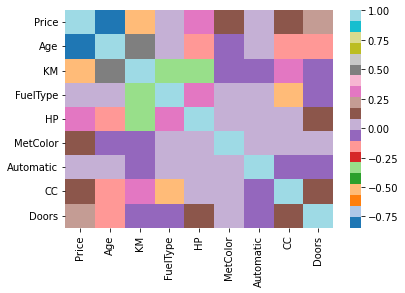

In [17]:
corr = new_dataset.corr()
print(corr.head())
sns.heatmap(corr, cmap="tab20")

In [18]:
columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = new_dataset.columns[columns]
print(selected_columns)

[ True  True  True  True  True  True  True  True  True]
Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors'],
      dtype='object')


In [21]:
new_dataset = new_dataset[selected_columns]
# print(type(new_dataset.iloc[:, :-1]))

## 4. Scaling and Transformation

In [23]:
# Perform Scaling and transformation
new_X = new_dataset.iloc[:, :-1].values
min_max_scalar = MinMaxScaler()
std_scalar = StandardScaler()

new_X[:,0:3] = std_scalar.fit_transform(min_max_scalar.fit_transform(new_X[:,0:3]))
new_X[:,4:5] = std_scalar.fit_transform(min_max_scalar.fit_transform(new_X[:,4:5]))
new_X[:,7:9] = std_scalar.fit_transform(min_max_scalar.fit_transform(new_X[:,7:9]))

In [19]:
print("Preprocessed new DataSet:\n", new_dataset)

Preprocessed new DataSet:
         Price        Age            KM  FuelType     HP  MetColor  Automatic  \
0     13500.0  23.000000  46986.000000       1.0   90.0       1.0        0.0   
1     13750.0  23.000000  72937.000000       1.0   90.0       1.0        0.0   
2     13950.0  24.000000  41711.000000       1.0   90.0       1.0        0.0   
3     14950.0  26.000000  48000.000000       1.0   90.0       0.0        0.0   
4     13750.0  30.000000  38500.000000       1.0   90.0       0.0        0.0   
...       ...        ...           ...       ...    ...       ...        ...   
1431   7500.0  55.672156  20544.000000       2.0   86.0       1.0        0.0   
1432  10845.0  72.000000  68647.239972       2.0   86.0       0.0        0.0   
1433   8500.0  55.672156  17016.000000       2.0   86.0       0.0        0.0   
1434   7250.0  70.000000  68647.239972       3.0   86.0       1.0        0.0   
1435   6950.0  76.000000      1.000000       2.0  110.0       0.0        0.0   

          CC